<a href="https://colab.research.google.com/github/hectormelo/Machine-Learning-Techniques/blob/main/Taller_3/Taller_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://raw.githubusercontent.com/hectormelo/Machine-Learning-Techniques/main/Banner.png" ><br>
# Machine Learning Techniques - MISIS4219

Primer semestre - 2024

- Carlos Raúl de la Rosa Peredo
- Jhon Stewar Rayo Mosquera

*Uno de los fenómenos más grandes que se presentan hoy en día son las opiniones de los usuarios sobre diferentes temas a través de Internet. Esta opinión es muy valiosa ya que permite saber en tiempo real y de primera mano los sentimientos que tienen las personas sobre un producto o servicio.*

*Es por ello, que una cadena hotelera en Andalucía ha decidido extraer la información de las opiniones de sus usuarios que han publicado en internet. Con el fin de poder entender cuáles son las ideas principales de los usuarios acerca de sus servicios, qué aspectos resaltan ellos sobre su servicios y, lo más importante, saber en qué pueden mejorar. Además, con este banco de datos esperan poder entrenar un modelo que les permita automáticamente determinar el sentimiento del usuario basado en las nuevas opiniones que puedan dejar.*

*Para poder tomar decisiones en este estudio, se debe presentar:*

* *Un análisis de las palabras más importantes en cada una de las categorías que le den relevancia a la cadena hotelera.*

* *Un proceso de limpieza y transformación de datos idóneo para el entrenamiento de los algoritmos.*

* *Una tabla comparativa, mostrando el rendimiento los dos mejores modelos entrenados con Naïve Bayes y KNN.*

* *A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?*


_**Datos**_: *Big_AHR.csv*

## Diccionario de Datos

*Se dan a disposición 13330 reviews de los usuarios los caules están compuestos de la siguiente forma:*

* **Review’s title**: *Título del review dado por el usuario.*
* **5-scale rating**: *Calificación del usuario. Escala de 1 a 5.*
* **Text**: Review del usuario.
* **City_Region**: *Región donde pertenece el hotel.*
* **Hotel’s name**: *Nombre del hotel evaluado.*
* **Binary sentiment label** *Clasificación sentimental. Donde 0 es Negativo, 1 es Positivo y 3 es Neutral.*

Este es un modelo base, en este caso se realizó la predicción sobre el rating que podría dar un usuario.

## 0. Importación de Librerías.

In [2]:
!pip install ydata-profiling
!pip install contractions
import nltk
nltk.download('all')

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/raul/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /home/raul/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/raul/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/raul/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /home/raul/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /home/raul/nltk_data...
[nltk_data]    |   Pack

True

In [3]:
#Manejo de datos
import pandas as pd

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

#Analisis de datos
from ydata_profiling import ProfileReport

#Procesamiento de lenguaje natural
from nltk.corpus import stopwords

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer # Vectorización de texto
from sklearn.preprocessing import StandardScaler, FunctionTransformer # Escalamiento de datos
from sklearn.decomposition import PCA # Análisis de componentes principales
from sklearn.pipeline import Pipeline


# Librería para la creación de nube de etiquetas -Wordcloud.
from wordcloud import WordCloud

/home/raul/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
## Definición de las palabras que no se deben tener en cuenta para el análisis.

stop_words = stopwords.words('spanish')
stop_words += ['hotel','you', 'want','to','08', '19', '18']

## 1. Carga y entendimiento de los datos

In [5]:
# URL del archivo CSV en el repositorio de GitHub
url = 'https://media.githubusercontent.com/media/oyar99/ISIS4219/main/Taller3/Big_AHR.csv'

# Cargar los datos en un dataframe
data = pd.read_csv(url)

# Visualizar los primeros registros de datos para darnos una idea de como estan estructurados
data.head()

,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,Excelente y personal amable,5,Un hotel muy bueno. El personal fue muy amabl...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
1,1,Céntrico,4,"Muy buen hotel al nivel de lo esperado, habita...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
2,2,Hotel excepcional,5,Magnífico hotel. La verdad es que todo perfect...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
3,3,WOW!!,5,"Hotel hermoso, buen diseño, original, limpio. ...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
4,4,Magnifico,5,Magnífica ubicación en pleno centro de Sevilla...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1


Ahora dividimos nuestros datos en dos conjuntos: training y test

In [6]:
#Partimos el conjunto de datos en un conjunto de entrenamiento y otro de test
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

,Unnamed: 0,title,rating,review_text,location,hotel,label
1297,1297,Excepcional,5,Hemos pasado un fin de semana en el hotel Eme ...,Seville_Province_of_Seville_Andalucia,EME_Catedral_Mercer_Hotel,1
10952,10952,Inmejorable relación calidad precio,5,Hotel con pocas habitaciones pero de una calid...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Don_Paula,1
8145,8145,UN 10,5,He estado alojado este puente con unos amigos ...,Granada_Province_of_Granada_Andalucia,Carmen_de_Ramilla,1
553,553,Hotel muy elegante y servicio muy atento,5,Fue una experiencia fantástica. No faltaba de...,Seville_Province_of_Seville_Andalucia,Hotel_Colon_Gran_Melia_The_Leading_hotel_of_th...,1
9960,9960,Máximo confort,5,"Este hotel se encuentra muy bien ubicado,a 10 ...",Cordoba_Province_of_Cordoba_Andalucia,Hotel_Selu,1


In [7]:
# Dimensionalidad de los datos de entrenamiento
train.shape

(14537, 7)

In [8]:
# Dimensionalidad de los datos de prueba
test.shape

(3635, 7)

Luego, de tener una idea basica de los datos. Separamos las caracteristicas de la variable que deseamos predecir

In [9]:
train_x, train_y = train.drop('label', axis=1), train.iloc[:, -1]
train_x.head()

,Unnamed: 0,title,rating,review_text,location,hotel
1297,1297,Excepcional,5,Hemos pasado un fin de semana en el hotel Eme ...,Seville_Province_of_Seville_Andalucia,EME_Catedral_Mercer_Hotel
10952,10952,Inmejorable relación calidad precio,5,Hotel con pocas habitaciones pero de una calid...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Don_Paula
8145,8145,UN 10,5,He estado alojado este puente con unos amigos ...,Granada_Province_of_Granada_Andalucia,Carmen_de_Ramilla
553,553,Hotel muy elegante y servicio muy atento,5,Fue una experiencia fantástica. No faltaba de...,Seville_Province_of_Seville_Andalucia,Hotel_Colon_Gran_Melia_The_Leading_hotel_of_th...
9960,9960,Máximo confort,5,"Este hotel se encuentra muy bien ubicado,a 10 ...",Cordoba_Province_of_Cordoba_Andalucia,Hotel_Selu


In [10]:
test_x, test_y = test.drop('label', axis=1), test.iloc[:, -1]
test_x.head()

,Unnamed: 0,title,rating,review_text,location,hotel
7317,7317,Decepcionados,1,Hace unos años nos alojamiento bastantes veces...,Granada_Province_of_Granada_Andalucia,Abades_Nevada_Palace
17227,17227,no podemos pedir mas,3,para el precio k cuesta el todo incluido no po...,NaN,NaN
4822,4822,Recomendable para una noche,3,"Centrico, comodo, pésima ducha, falta de corti...",Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Apartamentos_Marques_de_la_Merced
970,970,Lugar exquisito en el corazon de Sevilla,5,"Hermoso Hotel Boutique, en una inmejorable ubi...",Seville_Province_of_Seville_Andalucia,Hotel_Casa_de_Colon
4193,4193,Un acierto,5,Ubicación fenomenal para moverte hacia el cent...,Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Hotel_Soho_Boutique_Bahia_Malaga


<Axes: xlabel='label'>

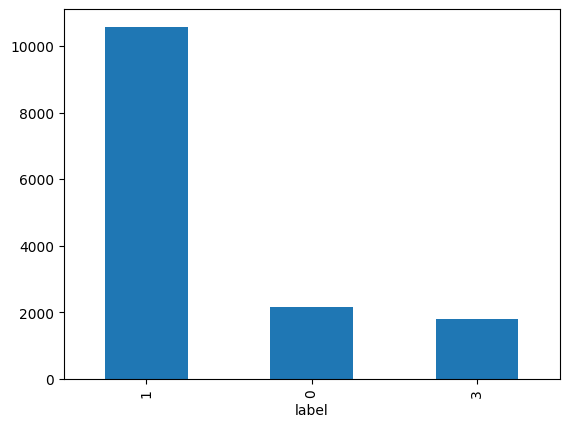

In [11]:
# Observamos la distribucón de clases en el conjunto de datos de entrenamiento
train_y.value_counts().plot(kind='bar')

<Axes: xlabel='label'>

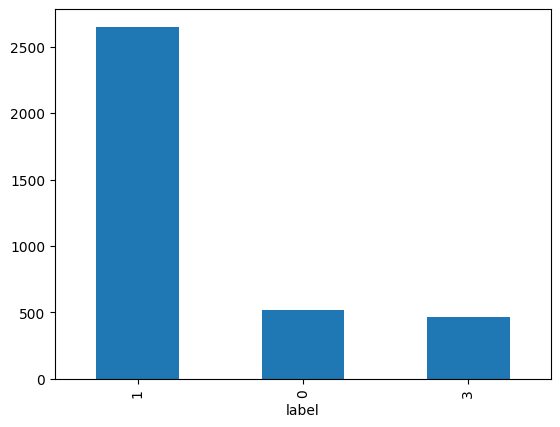

In [12]:
# Observamos la distribucion de clases en el conjunto de datos de prueba
test_y.value_counts().plot(kind='bar')

Los datos no parecen tener una distribucion balanceada, y existen mas datos dondes los usuarios se sienten positivos frente a su experiencia en los hoteles.

Ahora procederemos a hacer un analisis mas completo de los datos usando `ProfileReport`

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

ValueError: Only supported for TrueType fonts

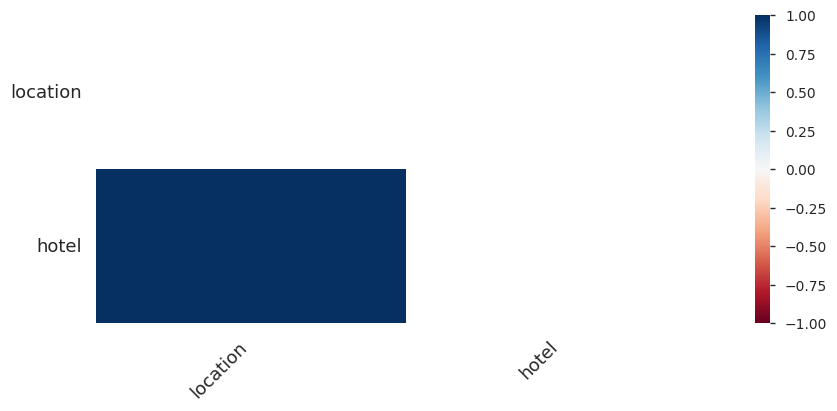

<Figure size 600x400 with 0 Axes>

In [13]:
ProfileReport(train)

Observamos que en las caracteristicas `title` y `reviewtext` existen palabras que no aportan mucha informacion como `y`, `en`, `de`, `la`, por lo que podemos usar librerias para omitir estas palabras, tambien denominadas `stopwords`. Se identificaron tambien otras palabras que no aportan informacion en el contexto del problema que estamos trabajando, como por ejemplo `hotel`.

In [14]:
def plot_word_cloud(texts,stopwords=[]):
    words = ''

    for text in texts:
        # cast each line of text
        text = str(text)
        # split the text into tokens - words
        tokens = text.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        words += " ".join(tokens)+" "

    wordcloud = WordCloud(width=800,
                          height =800,
                          background_color='white',
                          stopwords=stopwords,
                          min_font_size = 10
                ).generate(words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [15]:
# Mapear la clase a una variable descriptiva para entender mejor los datos
map_class_to_text = {
    0: "Negativo",
    1: "Positivo",
    3: "Neutral"
}

In [16]:
for feature in ['title', 'review_text']:
  print(f'---------- Feature: {feature} ----------\n')
  for _class in train_y.unique():
      print(f'---------- Words for class: {map_class_to_text[_class]} ----------')
      plot_word_cloud(train.loc[train['label']==_class, feature], stopwords=stop_words)
      print('\n')

---------- Feature: title ----------

---------- Words for class: Positivo ----------


ValueError: Only supported for TrueType fonts

Podemos observar que en los usuarios que tuvieron una experiencia positiva destacan palabras como `recomendable`, `excelente`, `agradable`. En aquellos que tuvieron una mala experiencia observamos palabras como `peor`, `decepcionante`, `pesimo`. Y en aquellos que tuvieron una experiencia neutra tenemos palabras como `buena`, `bien`, `normal`. Estas palabras aparecen mas en el titulo de los reviews que en la descripcion en si. En la descripcion destacan palabras mas comunes entre todas las clases como `desayuno`, `habitacion`, `personal`, por lo que nos podemos dar una idea que parte de la informacion que queremos usar esta en su mayoria en el titulo.

Previamente tambien identificamos que existe alta correlacion entre algunas variables del conjunto de datos, por lo que decidimos crear una matriz de correlacion oara rating y la clase transformando la clase para que exista una relacion lineal y pearson pueda identificar la correlacion.

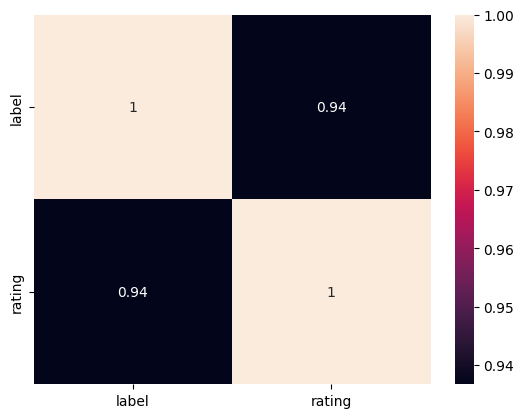

In [ ]:
train_rating_label = pd.concat([train['label'].map({ 0: 0, 3: 3, 1: 5 }), train['rating']], axis=1)
correlation_matrix= train_rating_label.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

## 2. Preparacion de los datos

Primero procedemos a dejar las caracteristicas mas importantes a partir del entenedimiento de los datos

In [ ]:
# Quitar primera columna que consiste en el numero del registro.
train_x = train_x.drop(columns='Unnamed: 0')
train_x.head()

,title,rating,review_text,location,hotel
1297,Excepcional,5,Hemos pasado un fin de semana en el hotel Eme ...,Seville_Province_of_Seville_Andalucia,EME_Catedral_Mercer_Hotel
10952,Inmejorable relación calidad precio,5,Hotel con pocas habitaciones pero de una calid...,Cordoba_Province_of_Cordoba_Andalucia,Hotel_Don_Paula
8145,UN 10,5,He estado alojado este puente con unos amigos ...,Granada_Province_of_Granada_Andalucia,Carmen_de_Ramilla
553,Hotel muy elegante y servicio muy atento,5,Fue una experiencia fantástica. No faltaba de...,Seville_Province_of_Seville_Andalucia,Hotel_Colon_Gran_Melia_The_Leading_hotel_of_th...
9960,Máximo confort,5,"Este hotel se encuentra muy bien ubicado,a 10 ...",Cordoba_Province_of_Cordoba_Andalucia,Hotel_Selu


In [ ]:
# Quitar primera columna que consiste en el numero del registro.
test_x = test_x.drop(columns='Unnamed: 0')
test_x.head()

,title,rating,review_text,location,hotel
7317,Decepcionados,1,Hace unos años nos alojamiento bastantes veces...,Granada_Province_of_Granada_Andalucia,Abades_Nevada_Palace
17227,no podemos pedir mas,3,para el precio k cuesta el todo incluido no po...,NaN,NaN
4822,Recomendable para una noche,3,"Centrico, comodo, pésima ducha, falta de corti...",Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Apartamentos_Marques_de_la_Merced
970,Lugar exquisito en el corazon de Sevilla,5,"Hermoso Hotel Boutique, en una inmejorable ubi...",Seville_Province_of_Seville_Andalucia,Hotel_Casa_de_Colon
4193,Un acierto,5,Ubicación fenomenal para moverte hacia el cent...,Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,Hotel_Soho_Boutique_Bahia_Malaga


### Crear 'embeddings' para entrenar los algoritmos

In [17]:
# Definir el transformador que convierte la salida del TF-IDF Vectorizer a un array denso
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

# Crear el pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words, max_features=1000, strip_accents='ascii',
                             ngram_range=(1, 2)
                             )
    ),
    ('to_dense', to_dense),
    ('scaler', StandardScaler()),
    ('pca', PCA(0.90))
])

# Ajustar el pipeline con los datos de entrenamiento
# Suponiendo que train_x es un DataFrame y 'title' es la columna con el texto a procesar
pipeline.fit(train_x['title'])

/home/raul/.local/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['eramos', 'estabamos', 'estais', 'estan', 'estara', 'estaran', 'estaras', 'estare', 'estareis', 'estaria', 'estariais', 'estariamos', 'estarian', 'estarias', 'esteis', 'esten', 'estes', 'estuvieramos', 'estuviesemos', 'fueramos', 'fuesemos', 'habeis', 'habia', 'habiais', 'habiamos', 'habian', 'habias', 'habra', 'habran', 'habras', 'habre', 'habreis', 'habria', 'habriais', 'habriamos', 'habrian', 'habrias', 'hayais', 'hubieramos', 'hubiesemos', 'mas', 'mia', 'mias', 'mio', 'mios', 'seais', 'sera', 'seran', 'seras', 'sere', 'sereis', 'seria', 'seriais', 'seriamos', 'serian', 'serias', 'si', 'tambien', 'tendra', 'tendran', 'tendras', 'tendre', 'tendreis', 'tendria', 'tendriais', 'tendriamos', 'tendrian', 'tendrias', 'teneis', 'tengais', 'tenia', 'teniais', 'teniamos', 'tenian', 'tenias',

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=1000, ngram_range=(1, 2),
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 strip_accents='ascii')),
                ('to_dense',
                 FunctionTransformer(accept_sparse=True,
                                     func=<function <lambda> at 0x7f9145b43a30>)),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=0.9))])

In [18]:
x_train = pipeline.transform(train_x['title'])

In [19]:
x_train

array([[ 2.10504561e-02, -3.06222410e-01, -4.85985171e-02, ...,
         5.45546203e-01,  8.37241542e-01, -1.87671722e-01],
       [-3.73689843e+00,  1.31023833e+01,  2.73936543e-01, ...,
        -3.70903234e-03,  3.09510984e-01, -2.88051403e-01],
       [ 2.92558272e-02, -3.39278249e-01, -5.25863633e-02, ...,
        -2.32985257e-01, -5.98501807e-01,  6.48691206e-01],
       ...,
       [ 2.97603128e-02, -4.70795346e-01, -8.68470994e-02, ...,
         2.51352614e-01,  2.56547080e-01, -4.31572066e-01],
       [ 3.28884727e-02, -2.87749737e-01, -3.27882099e-02, ...,
         2.76320014e-03, -2.98561821e-02,  1.37498006e-02],
       [ 4.05811025e-02, -3.80099104e-01, -5.10769744e-02, ...,
        -2.93593953e-01,  1.42875112e-01,  8.77838420e-02]])